In [3]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
import mpl_scatter_density
from sklearn.mixture import GaussianMixture

In [2]:
data = ascii.read('Catalogues/NGC5822_2.csv')
data

KeyboardInterrupt: 

In [4]:
data = pd.read_csv('Catalogues/NGC5822_2.csv')
data

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,226.356665,-56.357353,5880537795693680384,0.5296,-5.470,-2.782,95,NaN,1.0920,1.052,19.901850,21.685026,18.625610,3.059416,NaN,-37.181311,226.356709,-56.357341,NaN
1,226.361800,-56.353948,5880537795693680768,-0.0387,-5.575,-3.232,95,NaN,1.1746,1.072,18.881670,21.047142,17.567514,3.479628,NaN,-37.177135,226.361845,-56.353934,NaN
2,226.370376,-56.357701,5880537799989313408,0.7526,-4.256,-2.386,95,NaN,1.2387,1.063,20.189924,21.503067,19.058859,2.444208,NaN,-37.179021,226.370410,-56.357690,NaN
3,226.366431,-56.354436,5880537799989320448,0.8083,-2.857,-1.351,31,1.269,NaN,0.988,19.200275,20.446186,18.044996,2.401190,NaN,-37.176709,226.366454,-56.354430,0.825036
4,226.364406,-56.353145,5880537799989322880,-0.1550,-6.957,-4.280,95,NaN,1.2077,1.064,19.753582,21.257765,18.621637,2.636128,NaN,-37.175884,226.364462,-56.353126,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168234,226.289840,-52.372824,5900349178464466176,-1.6185,-3.531,-3.431,95,NaN,1.1041,1.032,20.356627,21.277514,19.249498,2.028015,NaN,-33.442668,226.289866,-52.372809,NaN
3168235,226.291209,-52.372532,5900349178465227520,0.4075,-4.950,-6.181,95,NaN,1.7444,1.163,20.275833,21.081573,19.279041,1.802532,NaN,-33.442117,226.291245,-52.372505,NaN
3168236,226.295759,-52.375918,5900349178485667456,0.3001,-1.529,-3.170,31,1.380,NaN,1.032,17.774643,18.613610,16.902786,1.710823,NaN,-33.444399,226.295770,-52.375904,0.327686
3168237,226.287764,-52.371343,5900349178485670016,0.4708,-4.717,-2.485,31,1.392,NaN,0.968,17.747835,18.506895,16.907770,1.599125,NaN,-33.441687,226.287799,-52.371332,0.498357


In [5]:
df1 = data[["RAJ2000", "DEJ2000", "pmRA", "pmDE", "BP-RP", "Plx_corr"]].copy()

In [6]:
df1

,RAJ2000,DEJ2000,pmRA,pmDE,BP-RP,Plx_corr
0,226.356709,-56.357341,-5.470,-2.782,3.059416,NaN
1,226.361845,-56.353934,-5.575,-3.232,3.479628,NaN
2,226.370410,-56.357690,-4.256,-2.386,2.444208,NaN
3,226.366454,-56.354430,-2.857,-1.351,2.401190,0.825036
4,226.364462,-56.353126,-6.957,-4.280,2.636128,NaN
...,...,...,...,...,...,...
3168234,226.289866,-52.372809,-3.531,-3.431,2.028015,NaN
3168235,226.291245,-52.372505,-4.950,-6.181,1.802532,NaN
3168236,226.295770,-52.375904,-1.529,-3.170,1.710823,0.327686
3168237,226.287799,-52.371332,-4.717,-2.485,1.599125,0.498357


In [7]:
#df1 = df1.to_pandas()
df1 = df1.fillna(0).values 

In [8]:
df1 = pd.DataFrame(df1)

In [9]:
df1= df1.rename(columns={0: 'RAJ2000', 1: 'DEJ2000', 2: 'pmRA', 3 : 'pmDE', 4: 'BP-RP',
                         5: 'Plx_corr'})
df1

,RAJ2000,DEJ2000,pmRA,pmDE,BP-RP,Plx_corr
0,226.356709,-56.357341,-5.470,-2.782,3.059416,0.000000
1,226.361845,-56.353934,-5.575,-3.232,3.479628,0.000000
2,226.370410,-56.357690,-4.256,-2.386,2.444208,0.000000
3,226.366454,-56.354430,-2.857,-1.351,2.401190,0.825036
4,226.364462,-56.353126,-6.957,-4.280,2.636128,0.000000
...,...,...,...,...,...,...
3168234,226.289866,-52.372809,-3.531,-3.431,2.028015,0.000000
3168235,226.291245,-52.372505,-4.950,-6.181,1.802532,0.000000
3168236,226.295770,-52.375904,-1.529,-3.170,1.710823,0.327686
3168237,226.287799,-52.371332,-4.717,-2.485,1.599125,0.498357


In [10]:
gmm = GaussianMixture(n_components = 5, tol=1e-7, max_iter=1000, random_state=60).fit(df1)

In [11]:
cluster = gmm.predict(df1)
df1['cluster'] = cluster

In [12]:
df1.cluster.value_counts()

cluster
2    1135089
3     872422
1     672205
0     395943
4      92580
Name: count, dtype: int64

In [13]:
df2 = data.assign(cluster=df1["cluster"])

In [14]:
a1 = df2[df2["cluster"]==0]
a2 = df2[df2["cluster"]==1]
a3 = df2[df2["cluster"]==2]
a4 = df2[df2["cluster"]==3]
a5 = df2[df2["cluster"]==4]

/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Gmag (mag)')

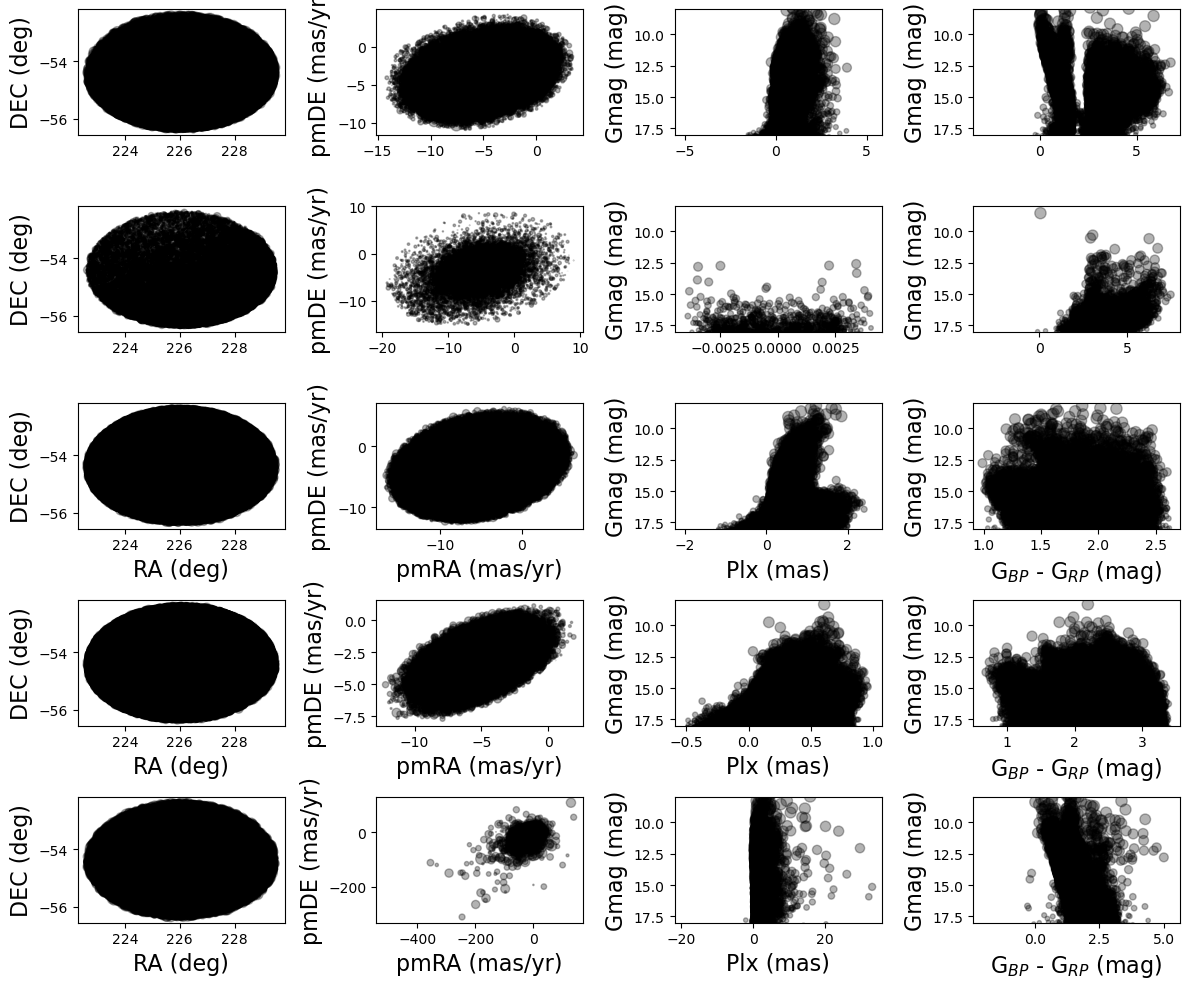

In [15]:
fig,ax = plt.subplots(5,4, figsize=(12,10),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx_corr, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx_corr, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[2,0].scatter(a3.RAJ2000, a3.DEJ2000, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,0].set_xlabel("RA (deg)",fontsize=16)
ax[2,0].set_ylabel("DEC (deg)",fontsize=16)
ax[2,1].scatter(a3.pmRA, a3.pmDE, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[2,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2,2].scatter(a3.Plx_corr, a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,2].set_ylim(18,8)
ax[2,2].set_xlabel("Plx (mas)",fontsize=16)
ax[2,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[2,3].scatter(a3["BP-RP"], a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,3].set_ylim(18,8)
ax[2,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[2,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[3,0].scatter(a4.RAJ2000, a4.DEJ2000, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,0].set_xlabel("RA (deg)",fontsize=16)
ax[3,0].set_ylabel("DEC (deg)",fontsize=16)
ax[3,1].scatter(a4.pmRA, a4.pmDE, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[3,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[3,2].scatter(a4.Plx_corr, a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,2].set_ylim(18,8)
ax[3,2].set_xlabel("Plx (mas)",fontsize=16)
ax[3,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3,3].scatter(a4["BP-RP"], a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,3].set_ylim(18,8)
ax[3,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[3,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[4,0].scatter(a5.RAJ2000, a5.DEJ2000, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,0].set_xlabel("RA (deg)",fontsize=16)
ax[4,0].set_ylabel("DEC (deg)",fontsize=16)
ax[4,1].scatter(a5.pmRA, a5.pmDE, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[4,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[4,2].scatter(a5.Plx_corr, a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,2].set_ylim(18,8)
ax[4,2].set_xlabel("Plx (mas)",fontsize=16)
ax[4,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[4,3].scatter(a5["BP-RP"], a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,3].set_ylim(18,8)
ax[4,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[4,3].set_ylabel("Gmag (mag)",fontsize=16)